In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [43]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [45]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [46]:
x = df.drop(columns=['Survived'])
y = df['Survived']


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [49]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Fare_999'] =x_train['Fare'].fillna(999)

In [50]:
x_train

,Age,Fare,Family,Age_99,Fare_999
331,45.5,28.5000,0,45.5,28.5000
733,23.0,13.0000,0,23.0,13.0000
382,32.0,7.9250,0,32.0,7.9250
704,26.0,7.8542,1,26.0,7.8542
813,6.0,31.2750,6,6.0,31.2750
...,...,...,...,...,...
106,21.0,7.6500,0,21.0,7.6500
270,NaN,31.0000,0,99.0,31.0000
860,41.0,NaN,2,41.0,999.0000
435,14.0,120.0000,3,14.0,120.0000


In [51]:
print(x_train['Age'].var())
print(x_train['Age_99'].var())
print(x_train['Fare'].var())
print(x_train['Fare_999'].var())

210.2517072477438
932.9665366701436
2761.031434948639
47525.47059536007


<Axes: ylabel='Density'>

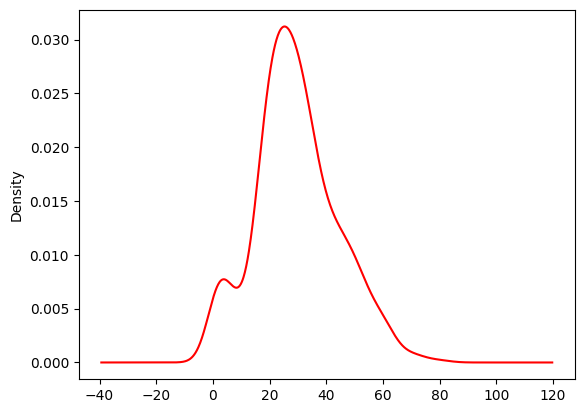

In [52]:
x_train['Age'].plot(kind='kde',color='red')

<Axes: ylabel='Density'>

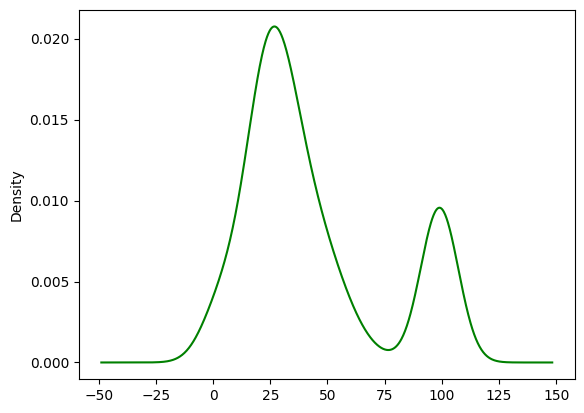

In [53]:
x_train['Age_99'].plot(kind='kde',color='green')

<Axes: ylabel='Density'>

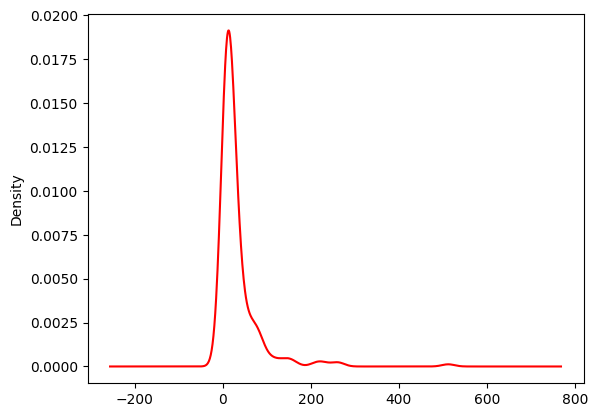

In [54]:
x_train['Fare'].plot(kind='kde',color='red')

<Axes: ylabel='Density'>

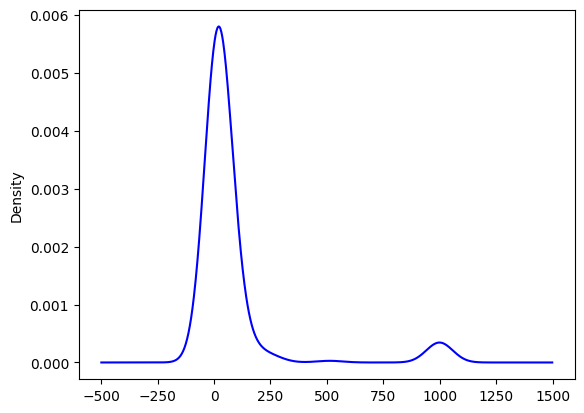

In [55]:
x_train['Fare_999'].plot(kind='kde',color='blue')

In [57]:
x_train.cov()

,Age,Fare,Family,Age_99,Fare_999
Age,210.251707,75.481375,-6.993325,210.251707,130.495777
Fare,75.481375,2761.031435,18.599163,-111.965046,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,16.878492
Age_99,210.251707,-111.965046,-6.941982,932.966537,-255.051165
Fare_999,130.495777,2761.031435,16.878492,-255.051165,47525.470595


In [58]:
x_train.corr()

,Age,Fare,Family,Age_99,Fare_999
Age,1.000000,0.091482,-0.319651,1.000000,0.039967
Fare,0.091482,1.000000,0.207193,-0.069365,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,0.046016
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.038303
Fare_999,0.039967,1.000000,0.046016,-0.038303,1.000000
